# Hight-Dimmensional Metrics in Julia

# Introduction

# How to Get Started

In [2]:
# install.packages("hdm")

# Prediction Using Approximate Sparsity

In [3]:
library(hdm)
# 3.2 A Joint Significance test for Lasso Regression
set.seed(1235)
n = 100
#sample size
p = 50
# number of variables
s = 3
# nubmer of variables with non-zero coefficients
X = matrix(rnorm(n * p), ncol = p)
beta = c(rep(5, s), rep(0, p - s))
Y = X %*% beta + rnorm(n) 

# cbind(Y, X)

r_data = function (name = "nn", ...){
    nn = paste0("r_", name, ".csv")
    # cbind(...)
    dta = cbind(...)
    write.csv(dta, nn, row.names = F)
    # print(head(dta))
}

# r_data()
r_data(name = "1", Y, X)
head(Y)

8.7974383
1.0688589
6.1139907
-0.2032082
1.0882188
20.8121398


In [4]:
lasso.reg = rlasso(Y ~ X, post = FALSE)
# use lasso, not-Post-lasso
# lasso.reg = rlasso(X, Y, post=FALSE)
sum.lasso <- summary(lasso.reg, all = FALSE)
# can also do print(lasso.reg, all=FALSE)


Call:
rlasso.formula(formula = Y ~ X, post = FALSE)

Post-Lasso Estimation:  FALSE 

Total number of variables: 50
Number of selected variables: 8 

Residuals: 
    Min      1Q  Median      3Q     Max 
-2.9036 -0.7971  0.1192  0.6712  2.8503 

            Estimate
(Intercept)    0.015
1              4.809
2              4.825
3              4.840
13            -0.002
21            -0.266
28            -0.053
29             0.011
37            -0.022

Residual standard error: 1.068
Multiple R-squared:  0.986
Adjusted R-squared:  0.9847
Joint significance test:
 the sup score statistic for joint significance test is 57.69 with a p-value of     0


In [5]:
set.seed(9)
yhat.lasso = predict(lasso.reg)
#in-sample prediction
Xnew = matrix(rnorm(n * p), ncol = p)
# new X
Ynew = Xnew %*% beta + rnorm(n)
#new Y
yhat.lasso.new = predict(lasso.reg, newdata = Xnew)
#out-of-sample prediction
post.lasso.reg = rlasso(Y ~ X, post = TRUE)
#now use post-lasso
r_data("1.1", Ynew, Xnew)
print(post.lasso.reg, all = FALSE)


Call:
rlasso.formula(formula = Y ~ X, post = TRUE)

(Intercept)            1            2            3           21  
   0.002234     4.981728     5.014848     5.025642    -0.443961  



In [6]:
yhat.postlasso = predict(post.lasso.reg)
#in-sample prediction
yhat.postlasso.new = predict(post.lasso.reg, newdata = Xnew)
#out-of-sample prediction
MAE <- apply(cbind(abs(Ynew - yhat.lasso.new), abs(Ynew - yhat.postlasso.new)), 2,
mean)
names(MAE) <- c("lasso MAE", "Post-lasso MAE")
print(MAE, digits = 2)

     lasso MAE Post-lasso MAE 
           1.1            1.0 


# Inference on Target Regression Coefficients

In [7]:
#4.1 Intuition for the Orthogonality Principle in Linear Models via Partialling Out
set.seed(1)
n = 5000
p = 20
X = matrix(rnorm(n * p), ncol = p)
colnames(X) = c("d", paste("x", 1:19, sep = ""))
xnames = colnames(X)[-1]
beta = rep(1, 20)
y = X %*% beta + rnorm(n)
dat = data.frame(y = y, X)
r_data("2", dat)
# dat

In [8]:
fmla = as.formula(paste("y ~ ", paste(colnames(X), collapse = "+")))
full.fit = lm(fmla, data = dat)
summary(full.fit)#$coef["d", 1:2]


Call:
lm(formula = fmla, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0722 -0.6628 -0.0182  0.6712  3.3985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01803    0.01407  -1.282      0.2    
d            0.97807    0.01371  71.329   <2e-16 ***
x1           1.00023    0.01408  71.045   <2e-16 ***
x2           1.00579    0.01436  70.034   <2e-16 ***
x3           1.00498    0.01406  71.474   <2e-16 ***
x4           0.98902    0.01416  69.841   <2e-16 ***
x5           1.03052    0.01377  74.813   <2e-16 ***
x6           1.00432    0.01400  71.762   <2e-16 ***
x7           1.00620    0.01418  70.962   <2e-16 ***
x8           0.98867    0.01384  71.449   <2e-16 ***
x9           0.98922    0.01377  71.817   <2e-16 ***
x10          1.02132    0.01394  73.265   <2e-16 ***
x11          1.00371    0.01432  70.096   <2e-16 ***
x12          1.00426    0.01398  71.834   <2e-16 ***
x13          1.02744    0.01443  71.213   <2e-16 ***
x14  

In [9]:
X

d,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
-0.62645381,-1.51637331,-0.80433160,-0.21390898,0.23534852,0.19656206,0.61792231,0.698630850,-0.2212570926,0.53765594,0.5258908,-0.131044323,0.34133410,-1.2063436,-1.00203611,0.35002823,-1.55915937,-1.09726565,-0.095043069,0.990653173
0.18364332,0.62914119,-1.05652565,-0.10672328,0.24482502,-0.41994269,0.89350575,-1.165071096,0.3517934862,1.25817047,-0.4875444,-1.424096275,0.41366648,0.2742060,0.02590761,0.40532916,0.20166217,2.42558030,-0.388059386,-0.724100470
-0.83562861,-1.67819404,-1.03539578,-0.46458931,-0.64218689,1.16326954,-0.42775624,0.171350482,0.1606018757,-0.64339123,1.1382508,-0.369662639,0.12203574,0.1868220,-0.44814178,0.08469671,1.04017610,1.05186103,2.136570026,0.670046482
1.59528080,1.17978115,-1.18556035,-0.68427247,-1.93480850,-0.40575597,-0.29990119,1.186716207,-0.1240523044,0.45780911,1.2151344,0.855045088,-1.58938065,-0.2637680,0.84323332,0.23416819,0.07195772,-0.08834213,0.556619445,-0.570115902
0.32950777,1.11765454,-0.50043951,-0.79080075,1.03869565,0.74409870,-0.53198327,0.410717706,0.6598738518,0.77203747,-0.4248307,0.978144262,-0.78743853,-1.0919296,-0.21846310,-0.15503122,-0.01526544,2.63979291,-0.590941640,0.722350775
-0.82046838,-1.23773594,-0.52498871,-0.33896375,-0.28355012,0.47661057,1.70598162,-1.241339455,-0.5038493407,0.47302237,-1.4508403,-0.071303448,-1.59206401,-1.3223181,0.47678629,-0.27158713,0.33938598,-1.72223733,1.520143448,-0.608483481
0.48742905,-1.23016454,-0.30243296,-1.26742994,-1.40972909,0.54132005,0.85163516,-0.717068399,2.3983853377,0.81118026,-0.7629252,-0.162261568,-1.15077226,0.3213934,0.31635179,0.68249291,-0.74885635,-0.21015268,0.540915287,1.425783376
0.73832471,0.59779092,0.47196813,-1.39410593,0.72318044,0.61062179,0.83951715,-0.361744735,0.5102855364,0.76119730,-0.4816799,0.337576726,0.27123268,0.3038257,0.62630632,-0.79358609,-1.75458588,-1.71569320,-0.158598127,-0.152884151
0.57578135,0.29886441,-0.24838395,0.41892490,2.03103552,0.05819951,0.66568006,-2.162207003,-1.1367672077,0.01614298,1.0499092,-0.461293369,-0.44153342,0.4353368,0.58871307,-1.14143554,-0.71933558,-1.20651495,-0.506137940,0.364743961
-0.30538839,-0.11013937,1.25931803,3.21518536,0.73049029,0.77819653,-1.08963046,-0.762162342,-1.3787293785,-0.46521276,-0.7097155,-0.933318392,-0.52755871,-1.0834206,-1.28480366,-0.05644578,-0.11966932,-0.12964334,-0.776778758,-0.390797128


In [10]:
fmla.y = as.formula(paste("y ~ ", paste(xnames, collapse = "+")))
fmla.d = as.formula(paste("d ~ ", paste(xnames, collapse = "+")))
rY = lm(fmla.y, data = dat)$res
# summary(rY)
# rY
rD = lm(fmla.d, data = dat)$res
partial.fit.ls = lm(rY ~ rD)
summary(partial.fit.ls)$coef["rD", 1:2]

Estimate Std. Error 
0.97807455 0.01368616

In [11]:
rY = rlasso(fmla.y, data = dat)$res
rD = rlasso(fmla.d, data = dat)$res
partial.fit.postlasso = lm(rY ~ rD)
summary(partial.fit.postlasso)$coef["rD", 1:2]

Estimate Std. Error 
0.97273870 0.01368677

# Instrumental Variable Esimation in a High-Dimensional Setting

In [12]:
Eff = rlassoEffect(X[, -1], y, X[, 1], method = "partialling out")
summary(Eff)$coef[, 1:2]

Estimate. Std. Error 
0.97273870 0.01368677

In [13]:
Eff = rlassoEffect(X[, -1], y, X[, 1], method = "double selection")
summary(Eff)$coef[, 1:2]

Estimate. Std. Error 
0.97807455 0.01415624

In [14]:
#4.2 Inference confidence Intervals and Significance Testing
set.seed(1)
n = 100
#sample size
p = 100
# number of variables
s = 3
# nubmer of non-zero variables
X = matrix(rnorm(n * p), ncol = p)
colnames(X) <- paste("X", 1:p, sep = "")
beta = c(rep(3, s), rep(0, p - s))
y = 1 + X %*% beta + rnorm(n)
data = data.frame(cbind(y, X))
colnames(data)[1] <- "y"
fm = paste("y ~", paste(colnames(X), collapse = "+"))
fm = as.formula(fm)

r_data(name = "3", data)


In [15]:
lasso.effect = rlassoEffects(fm, I = ~X1 + X2 + X3 + X8, data = data)
print(lasso.effect)


Call:
rlassoEffects.formula(formula = fm, data = data, I = ~X1 + X2 + 
    X3 + X8)

Coefficients:
     X1       X2       X3       X8  
2.94448  3.04127  2.97540  0.03693  



In [16]:
summary(lasso.effect)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)    
X1   2.94448    0.08815  33.404   <2e-16 ***
X2   3.04127    0.08389  36.253   <2e-16 ***
X3   2.97540    0.07804  38.127   <2e-16 ***
X8   0.03693    0.07192   0.513    0.608    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [17]:
confint(lasso.effect)

,2.5 %,97.5 %
X1,2.7717131,3.1172421
X2,2.8768512,3.2056979
X3,2.8224496,3.1283583
X8,-0.1040258,0.1778843


In [18]:
confint(lasso.effect, level = 0.99)

,0.5 %,99.5 %
X1,2.7174265,3.1715287
X2,2.8251856,3.2573635
X3,2.7743879,3.1764200
X8,-0.1483171,0.2221756


Warning message:
"Ignoring unknown aesthetics: width, h"


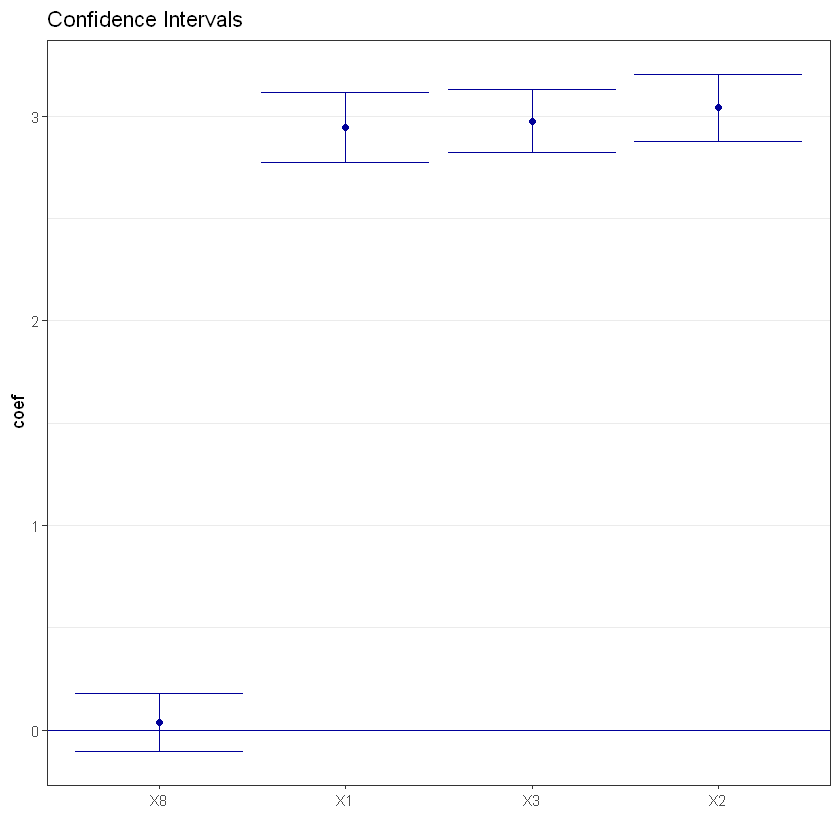

In [19]:
plot(lasso.effect, main = "Confidence Intervals")

In [20]:
cps2012$cps2012

NULL

In [52]:
# # 4.3

library(hdm)
cps2012 = head(hdm::cps2012, 200)
# cps2012 = data(cps2012)
X <- model.matrix(~-1 + widowed + divorced + separated + nevermarried +
hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3, data = cps2012)
# dim(X)
# [1] 29217
# 136
# X <- X[, which(apply(X, 2, var) != 0)]
# exclude all constant variables
# dim(X)
# [1] 29217
# 116
index.gender <- grep("female", colnames(X))
y <- cps2012$lnw
index.gender

integer(0)

In [55]:
dim(X)

[1] 200  15

In [53]:
# Sys.sleep(10)
effects.female <- rlassoEffects(x = X, y = y)#index.gender)
summary(effects.female)

[1] "Estimates and significance testing of the effect of target variables"
             Estimate. Std. Error t value Pr(>|t|)  
widowed        0.14650    0.32333   0.453   0.6505  
divorced      -0.11200    0.11811  -0.948   0.3430  
separated      0.39798    0.55678   0.715   0.4747  
nevermarried  -0.18945    0.12000  -1.579   0.1144  
hsd08               NA         NA      NA       NA  
hsd911        -0.40349    0.27904  -1.446   0.1482  
hsg           -0.08789    0.09273  -0.948   0.3433  
cg             0.13775    0.10527   1.308   0.1907  
ad             0.45886    0.18661   2.459   0.0139 *
mw                  NA         NA      NA       NA  
so                  NA         NA      NA       NA  
we                  NA         NA      NA       NA  
exp1           0.02174    0.02276   0.955   0.3394  
exp2          -0.09115    0.36770  -0.248   0.8042  
exp3          -0.02666    0.02231  -1.195   0.2320  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [56]:
joint.CI <- confint(effects.female, level = 0.95, joint = TRUE)
joint.CI

ERROR: Error in eigen(Sigma, symmetric = TRUE): infinite or missing values in 'x'


In [25]:
# Sys.sleep(7)
effects.female <- rlassoEffects(lnw ~ female + female:(widowed + divorced + separated +
nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 +
exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg +
cg + ad + mw + so + we + exp1 + exp2 + exp3)^2, data = cps2012, I = ~female +
female:(widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg +
cg + ad + mw + so + we + exp1 + exp2 + exp3))

In [80]:
# 4.4

GrowthData = head(hdm::GrowthData, 200)
# data(GrowthData)
# dim(GrowthData)
# [1] 90 63
y = GrowthData[, 1, drop = F]
d = GrowthData[, 3, drop = F]
X = as.matrix(GrowthData)[, -c(1, 2, 3)]
X1 = as.matrix(GrowthData)[, -c(1, 2)]
varnames = colnames(GrowthData)

In [60]:
options(scipen = 999)

In [96]:
xnames = varnames[-c(1, 2, 3)]
# names of X variables
dandxnames = varnames[-c(1, 2)]
# names of D and X variables
# create formulas by pasting names (this saves typing times)
fmla = as.formula(paste("Outcome ~ ", paste(dandxnames, collapse = "+")))
ls.effect = lm(fmla, data = GrowthData)
ls.effect
# lm(y ~ X1)
# y
# solve(t(X1) %*% X1) %*% (t(X1) %*% Y)


Call:
lm(formula = fmla, data = GrowthData)

Coefficients:
  (Intercept)       gdpsh465          bmp1l         freeop        freetar  
 0.2471608925  -0.0093779888  -0.0688626787   0.0800689736  -0.4889626051  
          h65           hm65           hf65            p65           pm65  
-2.3620986384   0.7071433995   1.6934484252   0.2655266949   0.1369526260  
         pf65            s65           sm65           sf65         fert65  
-0.3312669476   0.0390793061  -0.0306685067  -0.1799172803   0.0068808336  
       mort65       lifee065          gpop1          fert1          mort1  
-0.2334545034  -0.0149144728   0.9701845794   0.0088381892   0.0665629281  
      invsh41        geetot1        geerec1           gde1         govwb1  
 0.0744611255  -0.7151049061   0.6300046299  -0.4435752193   0.3374523641  
      govsh41       gvxdxe41         high65        highm65        highf65  
 0.4631746325  -0.7933815818  -0.7524838284  -0.3902618043  -0.4177487052  
      highc65       highcm65

In [99]:
dim(X)

[1] 90 60

In [97]:
dX = as.matrix(cbind(d, X))
lasso.effect = rlassoEffect(x = X, y = y, d = d, method = "partialling out")
summary(lasso.effect)

[1] "Estimates and significance testing of the effect of target variables"
     Estimate. Std. Error t value Pr(>|t|)    
[1,]  -0.04981    0.01394  -3.574 0.000351 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [100]:
dX = as.matrix(cbind(d, X))
doublesel.effect = rlassoEffect(x = X, y = y, d = d, method = "double selection")
summary(doublesel.effect)

[1] "Estimates and significance testing of the effect of target variables"
         Estimate. Std. Error t value Pr(>|t|)   
gdpsh465  -0.05001    0.01579  -3.167  0.00154 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [30]:
library(xtable)
table = rbind(summary(ls.effect)$coef["gdpsh465", 1:2], summary(lasso.effect)$coef[,
1:2], summary(doublesel.effect)$coef[, 1:2])
colnames(table) = c("Estimate", "Std. Error")
#names(summary(full.fit)£coef)[1:2]
rownames(table) = c("full reg via ols", "partial reg
via post-lasso ", "partial reg via double selection")
tab = xtable(table, digits = c(2, 2, 5))
tab

,Estimate,Std. Error
,<dbl>,<dbl>
full reg via ols,-0.009377989,0.02988773
partial reg via post-lasso,-0.049811465,0.01393636
partial reg via double selection,-0.050005855,0.01579138


# Inference on Treatment Effects in a Hight-Dimensional Setting

In [101]:
#5.1
AJR = head(hdm::AJR, 200)
y = AJR$GDP
d = AJR$Exprop
z = AJR$logMort
x = model.matrix(~-1 + Latitude + Latitude2 + Africa + Asia + Namer + Samer,
data = AJR)
# dim(AJR)

In [32]:
AJR.Xselect = rlassoIV(GDP ~ Exprop + (Latitude + Latitude2 + Africa + Asia + Namer +
Samer)^2 | logMort + (Latitude + Latitude2 + Africa + Asia + Namer + Samer)^2,
data = AJR, select.X = TRUE, select.Z = FALSE)
summary(AJR.Xselect)

[1] "Estimation and significance testing of the effect of target variables in the IV regression model"
       coeff.    se. t-value p-value   
Exprop 0.8450 0.2699   3.131 0.00174 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




In [33]:
confint(AJR.Xselect)

           2.5 %   97.5 %
Exprop 0.3159812 1.374072


In [133]:
fmla.y = GDP ~ Latitude + Latitude2 + Africa + Asia + Namer + Samer
fmla.d = Exprop ~ (Latitude + Latitude2 + Africa + Asia + Namer + Samer)
fmla.z = logMort ~ (Latitude + Latitude2 + Africa + Asia + Namer + Samer)
rY = lm(fmla.y, data = AJR)$res
rD = lm(fmla.d, data = AJR)$res
rZ = lm(fmla.z, data = AJR)$res
# ivfit.lm = tsls(y=rY,d=rD, x=NULL, z=rZ, intercept=FALSE)
ivfit.lm = tsls(rY ~ rD | rZ, intercept = FALSE)
# ivfit.lm
# print(cbind(ivfit.lm$coef, ivfit.lm$se), digits = 3)

   [,1]  [,2]
rD 1.09 0.439


In [135]:
rY = rlasso(fmla.y, data = AJR)$res
rD = rlasso(fmla.d, data = AJR)$res
rZ = rlasso(fmla.z, data = AJR)$res
ivfit.lasso = tsls(y=rY,d=rD, x=NULL, z=rZ, intercept=FALSE)
# ivfit.lasso = tsls(rY ~ rD | rZ, intercept = FALSE)
ivfit.lasso
# print(cbind(ivfit.lasso$coef, ivfit.lasso$se), digits = 3)


Call:
tsls.default(x = NULL, d = rD, y = rY, z = rZ, intercept = FALSE)

Coefficients:
    Estimate
d1  0.7978  


In [36]:
EminentDomain = head(hdm::EminentDomain, 200)
z <- as.matrix(EminentDomain$logGDP$z)
x <- as.matrix(EminentDomain$logGDP$x)
y <- EminentDomain$logGDP$y
d <- EminentDomain$logGDP$d
x <- x[, apply(x, 2, mean, na.rm = TRUE) > 0.05]
#
z <- z[, apply(z, 2, mean, na.rm = TRUE) > 0.05]
#

In [37]:
ED.ols = lm(y ~ cbind(d, x))
ED.2sls = tsls(y = y, d = d, x = x, z = z[, 1:2], intercept = FALSE)

In [38]:
lasso.IV.Z = rlassoIV(x = x, d = d, y = y, z = z, select.X = FALSE, select.Z = TRUE)
# or lasso.IV.Z = rlassoIVselectZt(x=X, d=d, y=y, z=z)
summary(lasso.IV.Z)

[1] "Estimates and significance testing of the effect of target variables in the IV regression model"
   coeff.    se. t-value p-value
d1 0.4146 0.2902   1.428   0.153




In [39]:
confint(lasso.IV.Z)

        2.5 %    97.5 %
d1 -0.1542764 0.9834796


In [40]:
lasso.IV.XZ = rlassoIV(x = x, d = d, y = y, z = z, select.X = TRUE, select.Z = TRUE)
summary(lasso.IV.XZ)

Estimates and Significance Testing of the effect of target variables in the IV regression model 
     coeff.      se. t-value p-value
d1 -0.02383  0.12851  -0.185   0.853




In [41]:
confint(lasso.IV.XZ)

        2.5 %    97.5 %
d1 -0.2757029 0.2280335


In [42]:
library(xtable)
table = matrix(0, 4, 2)
table[1, ] = summary(ED.ols)$coef[2, 1:2]
table[2, ] = cbind(ED.2sls$coef[1], ED.2sls$se[1])
table[3, ] = summary(lasso.IV.Z)[, 1:2]

[1] "Estimates and significance testing of the effect of target variables in the IV regression model"
   coeff.    se. t-value p-value
d1 0.4146 0.2902   1.428   0.153




In [43]:
table[4, ] = summary(lasso.IV.XZ)[, 1:2]

Estimates and Significance Testing of the effect of target variables in the IV regression model 
     coeff.      se. t-value p-value
d1 -0.02383  0.12851  -0.185   0.853




In [44]:
colnames(table) = c("Estimate", "Std. Error")
rownames(table) = c("ols regression", "IV estimation ", "selection on Z", "selection on X and Z")
tab = xtable(table, digits = c(2, 2, 7))
tab

,Estimate,Std. Error
,<dbl>,<dbl>
ols regression,0.007864732,0.009865927
IV estimation,-0.010733269,0.033766362
selection on Z,0.414601641,0.290249208
selection on X and Z,-0.023834697,0.128506538


In [45]:
pension = head(hdm::pension, 200)
y = pension$tw
d = pension$p401
z = pension$e401
X = pension[, c("i2", "i3", "i4", "i5", "i6", "i7", "a2", "a3", "a4", "a5", "fsize",
"hs", "smcol", "col", "marr", "twoearn", "db", "pira", "hown")]
# simple model
xvar = c("i2", "i3", "i4", "i5", "i6", "i7", "a2", "a3", "a4", "a5", "fsize", "hs",
"smcol", "col", "marr", "twoearn", "db", "pira", "hown")
xpart = paste(xvar, collapse = "+")
form = as.formula(paste("tw ~ ", paste(c("p401", xvar), collapse = "+"), "|", paste(xvar,
collapse = "+")))
formZ = as.formula(paste("tw ~ ", paste(c("p401", xvar), collapse = "+"), "|", paste(c("e401",
xvar), collapse = "+")))

In [46]:
pension.ate = rlassoATE(form, data = pension)
summary(pension.ate)

ERROR: Error in check_binary(d): Treatment variable and Instrumental Variable should be binary (0/1)!


In [ ]:
pension.atet = rlassoATET(form, data = pension)
summary(pension.atet)

Estimation and significance testing of the treatment effect 
Type: ATET 
Bootstrap: not applicable 
   coeff.   se. t-value p-value    
TE  12628  2944   4.289 1.8e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




## Error

In [ ]:
# pension.late = rlassoLATE(X, d, y, z)
# pension.late = rlassoLATE(formZ, data=pension)
# summary(pension.late)

In [ ]:
# pension.latet = rlassoLATET(X, d, y, z)

In [ ]:
xvar2 <- paste("(", xvar, ")^2", sep = "")
formExt = as.formula(paste("tw ~ ", paste(c("p401", xvar2), collapse = "+"), "|",
paste(xvar2, collapse = "+")))
formZExt = as.formula(paste("tw ~ ", paste(c("p401", xvar2), collapse = "+"), "|",
paste(c("e401", xvar2), collapse = "+")))

In [ ]:
pension.ate = rlassoATE(X, z, y)
pension.atet = rlassoATET(X, z, y)
# pension.late = rlassoLATE(X, d, y, z)
# pension.latet = rlassoLATET(X, d, y, z)

# The Lasso Methods for Discovery of Significant Causes amongst Many Potential Causes, with Many Controls

In [ ]:
set.seed(1)
n = 100
p1 = 20
p2 = 20
D = matrix(rnorm(n * p1), n, p1)
# Causes
W = matrix(rnorm(n * p2), n, p2)
X = cbind(D, W)
# Regressors
Y = D[, 1] * 5 + W[, 1] * 5 + rnorm(n)
#Outcome
confint(rlassoEffects(X, Y, index = c(1:p1)), joint = TRUE)

,2.5 %,97.5 %
V1,4.5145877,5.21430498
V2,-0.3142909,0.30494650
V3,-0.3524109,0.18678880
V4,-0.2542430,0.28738914
V5,-0.2765802,0.27627177
V6,-0.3214676,0.29422684
V7,-0.2262507,0.30094168
V8,-0.0473541,0.47366372
V9,-0.1865636,0.39023520
V10,-0.2372356,0.26411185
